This is a companion notebook for the book Deep Learning with Python, Second Edition. For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.

This notebook was generated for TensorFlow 2.6.

**# Getting started with neural networks: Classification and regression**

# **Classifying movie reviews: A binary classification example**

**# The IMDB dataset**

Loading the IMDB dataset

In [7]:
import tensorflow as tf
imdb=tf.keras.datasets.imdb

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
train_labels[0]

1

In [11]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


# **Preparing the data**

**Encoding the integer sequences via multi-hot encoding**

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# **Building your model**

**Model definition**

relu=max(0,z) and 16 here is dimension of the output of this layer .

we want to transform the input so we use activation function in deep learning so that learning is happening as it moves from one iteration to the next iteration.

logistic regression also uses optimizer to change the weights to feed back but they don't use activation function unlike deep learning.

sigmoid activation function will genaerate a value i.e. either 0 or 1.since it is a classification problem we want the output to be either 0 or 1 so we use the last layer i.e. output layer activation function as sigmoid.

In [19]:
layers=tf.keras.layers

model = tf.keras.Sequential([
    layers.Dense(16, activation="relu"),  #this is the input layer
    layers.Dense(16, activation="relu"), #this is the hidden layer
    layers.Dense(1, activation="sigmoid") #this is the output layer
])

**Compiling the model**

Here loss function takes the difference between the actual output and the predicted output and feed it to optimizer which is used to adjust the weights for different layers accordingly for the next iteraration in the deep learning model.

adam and rmsprop are 2 optimizer used in deep learning. adam used to be used earlier. rmsprop is more popular now.

In [20]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# **Validating your approach**

Validation data is extremely important otherwise we will not know the optimal  training capability of our model building which might lead to overfitting.

**Setting aside a validation set**

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

say we have 1000 rows of input data and we keep batch size of 500 so we will need to run training on entire data in 2 batches to comple all 1000 rows.this is what is meant by the term batch size.

Epocs are number of iteration for which the Deep learning model is being run.

In [22]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 72ms/step - loss: 0.5309 - accuracy: 0.7642 - val_loss: 0.3985 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3221 - accuracy: 0.8934 - val_loss: 0.3114 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2391 - accuracy: 0.9215 - val_loss: 0.3303 - val_accuracy: 0.8638
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1932 - accuracy: 0.9356 - val_loss: 0.2743 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1580 - accuracy: 0.9499 - val_loss: 0.2832 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1366 - accuracy: 0.9558 - val_loss: 0.2891 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1151 - accuracy: 0.9637 - val_loss: 0.3491 - val_accuracy: 0.8678
Epoch 8/20
30

Normally after improving the model accuracy on validation data once the model got fitted.we should then have test data as well and we should run the built model on test data as well.

validation accuracy is the accuracy for validation data.seeing validation accuracy we should decide upto what epoch training model need to run.if validation accuracy becomes almost constant and not tend to improve we can stop training our model uptil that epochs otherwise we will be just doing overfitting.here.accuracy term denotes training accuracy and val_accuracy denotes accuracy for the validation data.

we can see from above training accuracy improved till .9998 on the last epoch but validation accuracy has started going down in the last few epochs which should not happen so we should adjust our epoch in such a way that validation accuracy for validation data should not start going down.

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# **Plotting the training and validation loss**

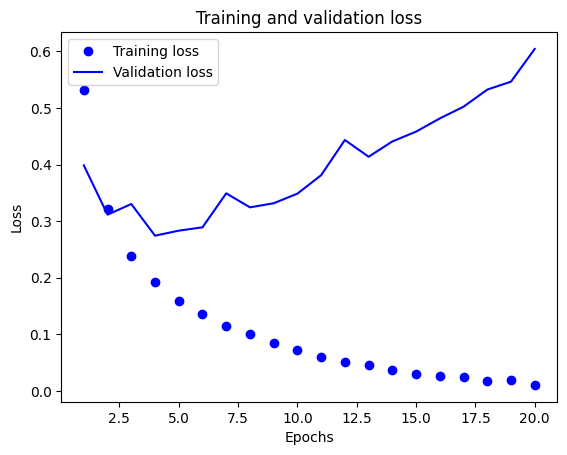

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Plotting the training and validation accuracy**

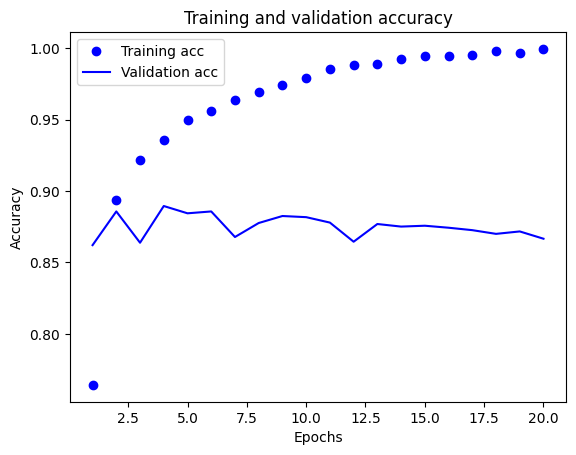

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Retraining a model from scratch**

In [28]:
model = tf.keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 3s 55ms/step - loss: 0.5685 - accuracy: 0.7652 - val_loss: 0.4509 - val_accuracy: 0.8590
Epoch 2/4
30/30 [==============================] - 1s 25ms/step - loss: 0.3652 - accuracy: 0.8853 - val_loss: 0.3331 - val_accuracy: 0.8828
Epoch 3/4
30/30 [==============================] - 1s 24ms/step - loss: 0.2662 - accuracy: 0.9132 - val_loss: 0.2945 - val_accuracy: 0.8857
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2979 - accuracy: 0.8810


In [29]:
results

[0.29789113998413086, 0.8809999823570251]

**Using a trained model to generate predictions on new data**

In [31]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.34331968],
       [0.9959311 ],
       [0.957829  ],
       ...,
       [0.16681609],
       [0.20294398],
       [0.6820928 ]], dtype=float32)

In [ ]:
!jupyter nbconvert --to html BinaryClassificationScript.ipynb